<a href="https://colab.research.google.com/github/JamesUMD/Kaggle/blob/main/Titanic/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#Import of Libraries

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# DNN
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam



import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [31]:
#import of Data
train = pd.read_csv('https://raw.githubusercontent.com/JamesUMD/Kaggle/main/Titanic/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/JamesUMD/Kaggle/main/Titanic/test.csv')
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

**Problem Statement:** 


---



Develop an Algorithim that Predicts the Survial outcome of passengers on the Titanic


In [32]:
print('Train Sample of Dataset')
train.sample(10)

Train Sample of Dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S
321,322,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S


In [33]:
print('Test Sample of Dataset')
test.sample(10)

Test Sample of Dataset


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
95,987,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
313,1205,3,"Carr, Miss. Jeannie",female,37.0,0,0,368364,7.7500,NaN,Q
234,1126,1,"Cumings, Mr. John Bradley",male,39.0,1,0,PC 17599,71.2833,C85,C
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
58,950,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,NaN,S
161,1053,3,"Touma, Master. Georges Youssef",male,7.0,1,1,2650,15.2458,NaN,C
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
226,1118,3,"Asplund, Mr. Johan Charles",male,23.0,0,0,350054,7.7958,NaN,S
330,1222,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.7500,NaN,S


**Data Cleansing**


---






In [34]:
print(train.describe())
print(test.describe())

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.3923

In [35]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harris, Mr. Walter",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [36]:
#Null Value Assesment


#combines train and test dataset together to cleanse data at once
data = [train,test]
df = pd.concat(data)

print('Train Columns with null values:\n', train.isnull().sum())
print('Test Columns with null values:\n', test.isnull().sum())

Train Columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Test Columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [37]:
#Cleansing of Null Values

#replace null values  - age with median, embared with mode, fare with medidan

for dfs in data:
    dfs['Age'].fillna(dfs['Age'].median(), inplace = True)
    dfs['Embarked'].fillna(dfs['Embarked'].mode()[0], inplace = True)
    dfs['Fare'].fillna(dfs['Fare'].median(), inplace = True)


In [38]:
#Remove Columns

#Drops Passengider id, ticket, and cabin from dataset because this is personal information not needed for prediction 

columns = ['PassengerId','Cabin', 'Ticket']

for dfs in data:
    dfs.drop(columns, axis = 1, inplace = True)

In [39]:
#Checks Null Values of Datasets 

print('Train Columns with null values:\n', train.isnull().sum())
print('Test Columns with null values:\n', test.isnull().sum())

Train Columns with null values:
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Test Columns with null values:
 Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


**Feature Engineering**


---



In [40]:
#Adds Some addition Features to the Dataset

for dfs in data:
    #Adds Family Size feature 
    dfs['FamilySize'] = dfs['SibSp'] + dfs['Parch'] + 1

    #Adds if a person is traveling alone
    dfs['Alone'] = 1
    dfs['Alone'].loc[dfs['FamilySize'] > 1] = 0 
    dfs['Alone'] = dfs['Alone'].astype('category')

    #Add bin for ages 
    dfs['AgeBin'] = pd.cut(dfs['Age'].astype('int'), 5)
    dfs['AgeBin'] = dfs['AgeBin'].astype('category')

    #Fare Bin 
    dfs['FareBin'] = pd.cut(dfs['Fare'], 4)
    dfs['FareBin'] = dfs['FareBin'].astype('category')

    #Title 
    dfs['Title'] = dfs['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
   

**Analyze Features & Data Exploration**

---



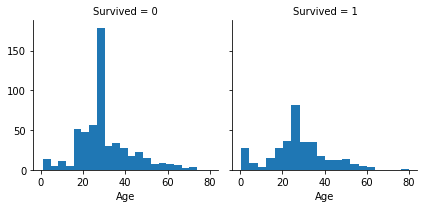

In [41]:
p = sns.FacetGrid(train, col='Survived')
p.map(plt.hist, 'Age', bins=20)

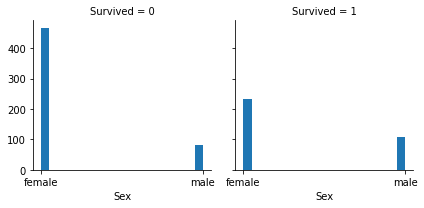

In [42]:
p = sns.FacetGrid(train, col='Survived')
p.map(plt.hist, 'Sex', bins=20)

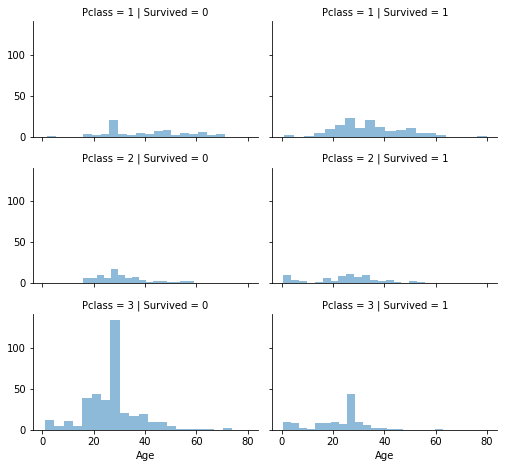

In [43]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

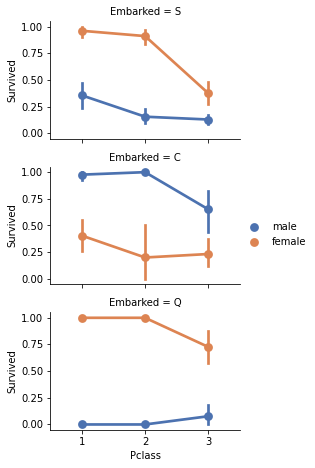

In [44]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [45]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [46]:
train[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [47]:
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [48]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [49]:
train[['FareBin', 'Survived']].groupby(['FareBin'], as_index=False).mean()

,FareBin,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [50]:
for dfs in data:
    dfs.loc[dfs['Fare'] <= 7.91, 'Fare'] = 0
    dfs.loc[(dfs['Fare'] > 7.91) & (dfs['Fare'] <= 14.454), 'Fare'] = 1
    dfs.loc[(dfs['Fare'] > 14.454) & (dfs['Fare'] <= 31), 'Fare']   = 2
    dfs.loc[dfs['Fare'] > 31, 'Fare'] = 3
    dfs['Fare'] = dfs['Fare'].astype(int)

In [51]:
train[['AgeBin', 'Survived']].groupby(['AgeBin'], as_index=False).mean()

,AgeBin,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [52]:
#Replaces AgeBin band with features 

for dfs in data:    
    dfs.loc[ dfs['Age'] <= 16, 'Age'] = 0
    dfs.loc[(dfs['Age'] > 16) & (dfs['Age'] <= 32), 'Age'] = 1
    dfs.loc[(dfs['Age'] > 32) & (dfs['Age'] <= 48), 'Age'] = 2
    dfs.loc[(dfs['Age'] > 48) & (dfs['Age'] <= 64), 'Age'] = 3
    dfs.loc[ dfs['Age'] > 64, 'Age']
train.head()




,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Alone,AgeBin,FareBin,Title
0,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,0,S,2,0,"(16.0, 32.0]","(-0.512, 128.082]",Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,3,C,2,0,"(32.0, 48.0]","(-0.512, 128.082]",Mrs
2,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,1,S,1,1,"(16.0, 32.0]","(-0.512, 128.082]",Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,3,S,2,0,"(32.0, 48.0]","(-0.512, 128.082]",Mrs
4,0,3,"Allen, Mr. William Henry",male,2.0,0,0,1,S,1,1,"(32.0, 48.0]","(-0.512, 128.082]",Mr


In [53]:
columnsdrop = ['Name', 'AgeBin', 'FareBin']
train.drop(columnsdrop, axis = 1, inplace = True)
test.drop(columnsdrop, axis = 1, inplace = True)

In [54]:
for dfs in data:
  dfs['Embarked'] = pd.factorize(dfs.Embarked)[0] + 1
  dfs['Sex'] = pd.factorize(dfs.Sex)[0] + 1
  dfs['Title'] = pd.factorize(dfs.Title)[0] + 1

In [55]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 10), (891,), (418, 10))

**Model - ML & DNN**


---



In [56]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print('Logestic Regression Score:',  acc_log)

coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

Logestic Regression Score: 79.69


,Feature,Correlation
1,Sex,2.330080
6,Embarked,0.237051
5,Fare,0.224049
9,Title,0.157340
4,Parch,0.005439
2,Age,-0.037177
7,FamilySize,-0.252902
3,SibSp,-0.259489
0,Pclass,-0.684280
8,Alone,-0.692707


In [57]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.82

In [58]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.97

In [59]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.21

In [60]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

77.33

In [61]:
# Linear SVC 

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

In [62]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

70.48

In [63]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.45

In [64]:
#Random Forest 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.45

In [66]:
# DNN Model Spilt

from sklearn.model_selection import train_test_split


X = train.drop("Survived", axis=1)
Y = train["Survived"]

X_train_DNN, X_test_DNN, y_train_DNN, y_test_DNN = train_test_split(X, Y, test_size=0.25, random_state=42)

In [72]:
# DNN

from sklearn.metrics import roc_auc_score

model = keras.Sequential([
           keras.layers.Flatten(input_shape = (10,)),
           keras.layers.Dense(2014, activation = 'relu'), 
           keras.layers.Dense(256, activation = 'relu'),
           keras.layers.Dense(128, activation = 'relu'),
           keras.layers.Dense(32, activation = 'relu'),
           keras.layers.Dense(1, activation = 'sigmoid')            

])

model.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_DNN, y_train_DNN, epochs = 50, shuffle = True)
y_score = model.predict(X_test_DNN)

auc_dnn = (roc_auc_score(y_test_DNN, y_score)*100)
print(auc_dnn)

Epoch 1/50
21/21 [==============================] - 1s 9ms/step - loss: 5.2951 - accuracy: 0.5425
Epoch 2/50
21/21 [==============================] - 0s 9ms/step - loss: 0.6983 - accuracy: 0.5946
Epoch 3/50
21/21 [==============================] - 0s 8ms/step - loss: 0.5811 - accuracy: 0.7267
Epoch 4/50
21/21 [==============================] - 0s 9ms/step - loss: 0.5532 - accuracy: 0.7826
Epoch 5/50
21/21 [==============================] - 0s 9ms/step - loss: 0.5430 - accuracy: 0.7602
Epoch 6/50
21/21 [==============================] - 0s 9ms/step - loss: 0.5221 - accuracy: 0.7928
Epoch 7/50
21/21 [==============================] - 0s 10ms/step - loss: 0.4704 - accuracy: 0.8104
Epoch 8/50
21/21 [==============================] - 0s 9ms/step - loss: 0.5636 - accuracy: 0.7498
Epoch 9/50
21/21 [==============================] - 0s 9ms/step - loss: 0.5102 - accuracy: 0.8198
Epoch 10/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4822 - accuracy: 0.7938
Epoch 11/50
21/21 

In [73]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','DNN:AUC '],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, auc_dnn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.450000
8,Decision Tree,89.450000
9,DNN:AUC,88.894013
1,KNN,85.970000
0,Support Vector Machines,81.820000
7,Linear SVC,80.250000
2,Logistic Regression,79.690000
5,Perceptron,77.330000
4,Naive Bayes,76.210000
6,Stochastic Gradient Decent,70.480000
